K-mean : Hard clustering, where each data points belongs only to one cluster

K-Mean is unsupervised learning algorithm

### Data preparation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# creating datasets using make_blobs
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [3]:
X.shape # features

(500, 2)

In [4]:
Y.shape # target, but these target is not going to used while training the K-mean model since it is unsupervised leaning

(500,)

In [5]:
np.unique(Y) # just for refernce checking the targeted labels

array([0, 1, 2, 3, 4])

### Features scaling : z-score Normalization and Features Visualization

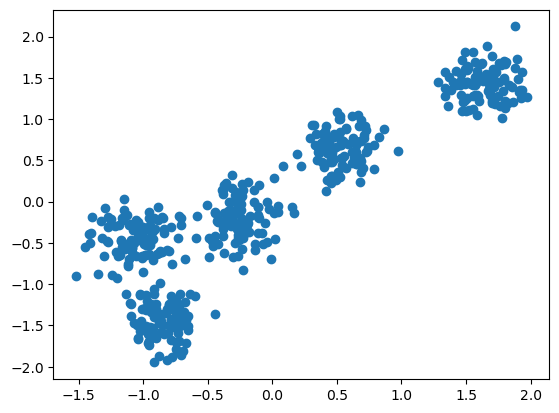

In [6]:
## z-score Normalization :
mu = X.mean(axis=0) # column wise mean calculation
std = X.std(axis=0) # column wise standard deviation calculation

X = (X-mu)/std

# After z-score normalization, features data ranges between -2 to 2 as shown in scatter plot

## Visualization
plt.scatter(X[:,0],X[:,1])
plt.show()

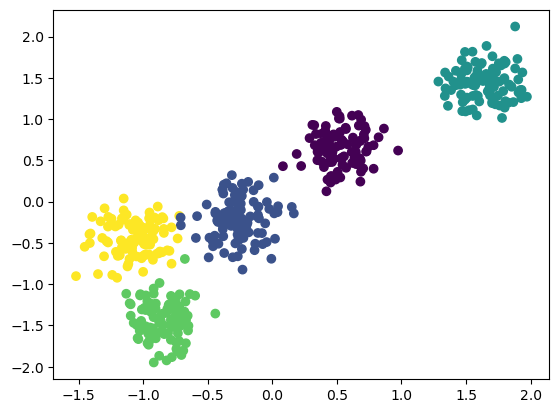

In [7]:
# for our refernce colouring the features based on their target values
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### step1 : Initialization of centroids

In [18]:
def initCent():
    k = 5
    colours = ["green", "pink", "yellow", "blue", "red"]
    centroids = {}

    for i in range(k):
        n_features = 2
        '''
        np.random.random(): This will give only one random number, but we need 2-D like (x, y),
        so we need to give argument as (2,)
        
        np.random.random(2,): This will generate centers like [0.21230986 0.91954876] 
        but the generated values range between 0 and 1.
        
        To make (0,1) into (-2,2), we:
        1. Multiply (0,1) by 2 → (0,2)
        2. Subtract 1 → (-1,1)
        3. Multiply by 2 again → (-2,2)
        '''
        centers = (((np.random.random(n_features) * 2) - 1) * 2)
        centroids[i] = {
            "center": centers,
            "colors": colours[i],
            "points": []
        }
    return centroids

### step2(a) : Assigning points to Centroids

In [9]:
# distance calculation method
def distance(p,q):
    return np.sqrt(np.sum(p-q)**2)

In [10]:
# distance method verification using sample points
dist = distance(np.array([1,1]),np.array([1, 1]))
dist

0.0

In [11]:
# function to assign points to the nearest centroid

def assignPtsCent(X,centroids):
    
    for i in range (X.shape[0]):
        cx = X[i]
        dist = []
        
        for j in range (len(centroids)):
            dist.append(distance(cx,centroids[j]["center"]))
            
        #selection of minimum distance index
        centroidId = np.argmin(dist)
        
        #After identification of min distance index of centroid, assign the point to that particular centroid based on its index (centroidId)
        centroids[centroidId]["points"].append(cx)
        
    

In [12]:
# calling the method
#assignPtsCent(X,centroids)

### step2(b) : Updating Centroids

In [13]:
def updateCentroids(centroids):
    
    for i in range (len(centroids)):
        
        # update centroid by taking mean of all the points assigned to that centroid
        pts = np.array(centroids[i]["points"])
        
        if pts.shape[0] > 0:  # in worst case no points will be assigned to the centroid, if that centroid is worst
            newCenter = pts.mean(axis=0)
            centroids[i]["center"] = newCenter
            
            # after updating centroid value, remove all the assigned points
            centroids[i]["points"] = [] # clear the list to repeat 2a step again
            

In [14]:
# plotting 

def plotClusters(centroids):
    
    for i in range (len(centroids)):
        pts = np.array(centroids[i]["points"])
        
        # plot points
        if pts.shape[0] > 0:
            plt.scatter(pts[:,0],pts[:,1],color= centroids[i]['colors'])
            
        # plot centroids 
        plt.scatter(centroids[i]["center"][0],centroids[i]["center"][1], color = 'black', marker = "*")
    

### step 2c : Repeat 2a and 2b, until convergence

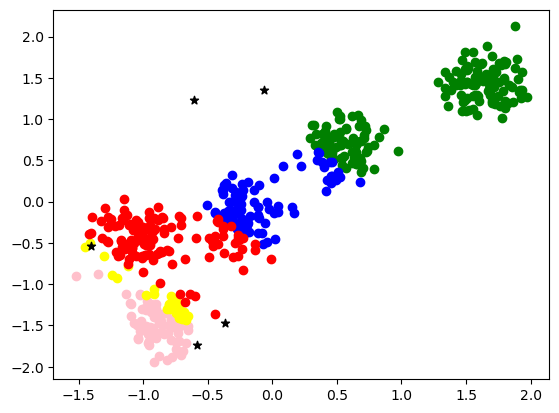

In [29]:
centroids = initCent() # initialization of centroid
assignPtsCent(X,centroids) #assigning points to centoids
plotClusters(centroids)

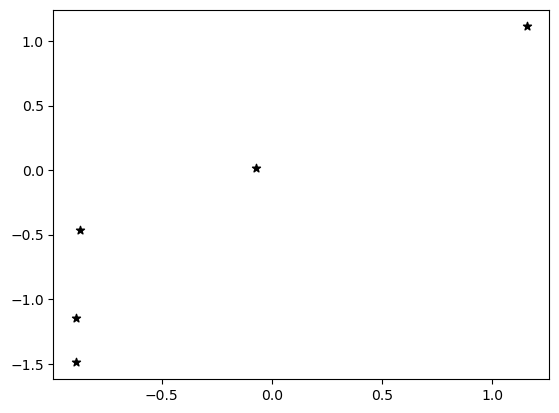

In [30]:
updateCentroids(centroids)
plotClusters(centroids)

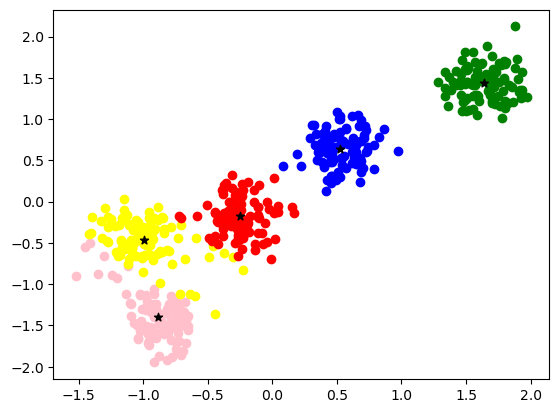

In [45]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

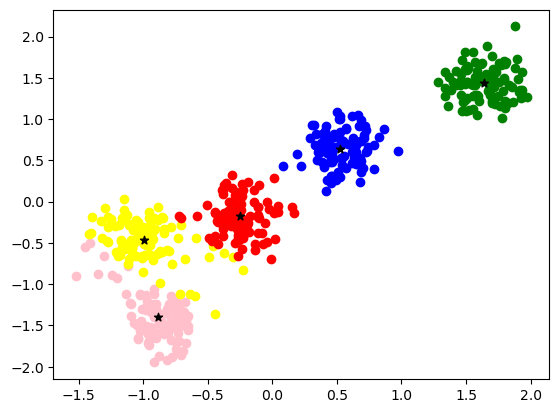

In [46]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

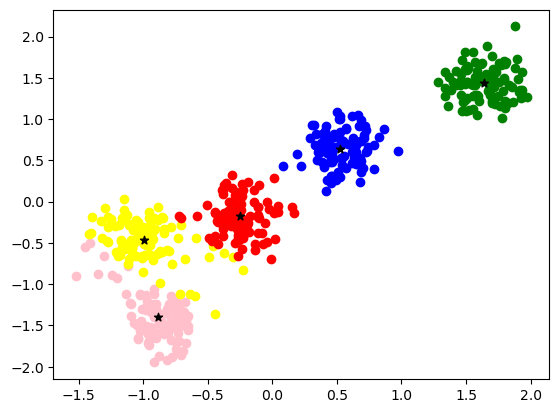

In [47]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

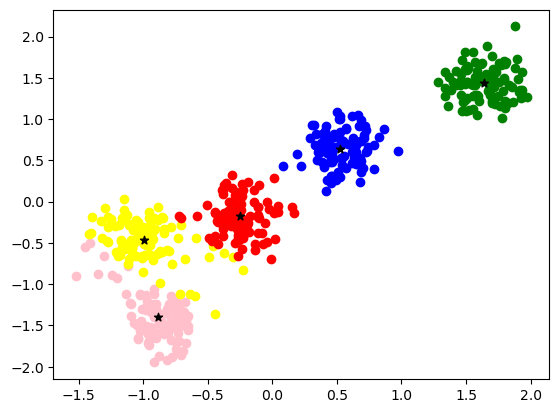

In [48]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

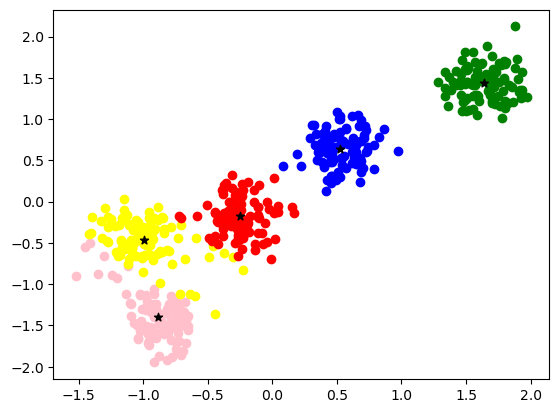

In [49]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

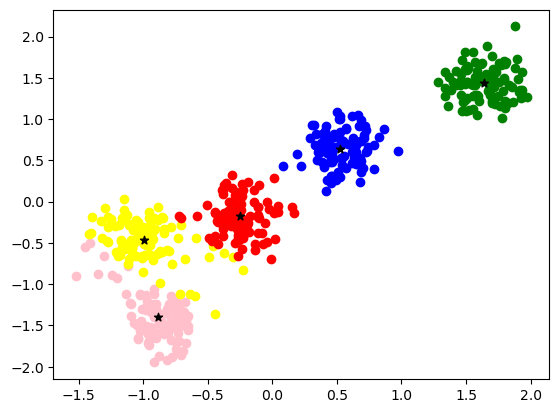

In [44]:
updateCentroids(centroids)
assignPtsCent(X,centroids)
plotClusters(centroids)

## Observation :

### convergence speed depends on initial centroids value